In [13]:
from google.colab import files
uploaded = files.upload()
import io, pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['car_evaluation.csv']))
df.head()


Saving car_evaluation.csv to car_evaluation.csv


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [15]:
!pip -q install imbalanced-learn
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [16]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if y.nunique()<=20 else None
)
X_train.shape, X_test.shape

((1381, 15), (346, 15))

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



rf = RandomForestClassifier(
    n_estimators=300, max_features='sqrt', bootstrap=True,
    oob_score=True, n_jobs=-1, random_state=42
)
rf.fit(X_train, y_train)
print("OOB score:", rf.oob_score_)
print("Test accuracy:", accuracy_score(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))



OOB score: 0.9007965242577842
Test accuracy: 0.9046242774566474
              precision    recall  f1-score   support

         acc       0.80      0.83      0.82        77
        good       0.57      0.29      0.38        14
       unacc       0.94      0.99      0.97       242
       vgood       1.00      0.46      0.63        13

    accuracy                           0.90       346
   macro avg       0.83      0.64      0.70       346
weighted avg       0.90      0.90      0.90       346



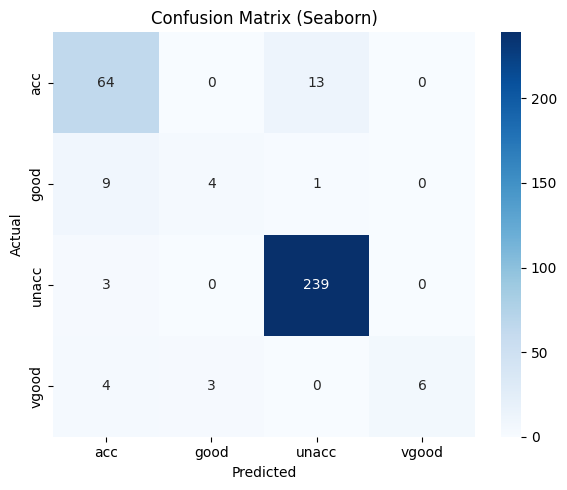

In [20]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix (Seaborn)")
plt.tight_layout()
plt.show()


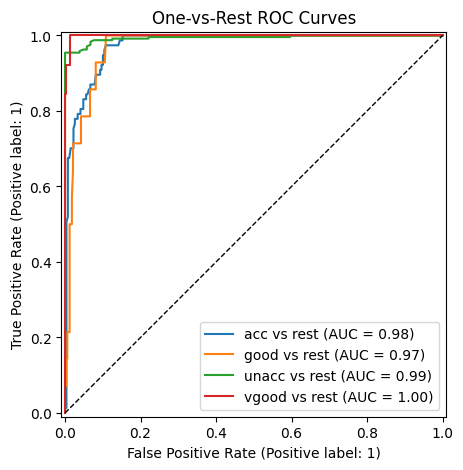

In [23]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = rf.predict_proba(X_test)

fig, ax = plt.subplots(figsize=(6,5))
for i, cls in enumerate(classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i], y_score[:, i],
        name=f"{cls} vs rest",
        ax=ax,

    )

ax.plot([0,1], [0,1], "k--", lw=1)
ax.set_title("One-vs-Rest ROC Curves")
plt.show()
